<a href="https://colab.research.google.com/github/alifaisal-sadeq/Assignment-3-ISE_571/blob/main/Programming_Exercise_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install pymoo

NSGA-II Optimization completed!
Number of non-dominated solutions found: 100
Solution #1:
  Gate Assignments (x) = [0.64494272 0.5283585  0.67756553 0.66995555 0.21164248]
  Objectives (f1, f2) = [4.5e+03 4.0e+00]
Solution #2:
  Gate Assignments (x) = [0.40869067 0.56107953 0.55637381 0.61159187 0.1007009 ]
  Objectives (f1, f2) = [4.5e+03 4.0e+00]
Solution #3:
  Gate Assignments (x) = [0.115539   0.47754374 0.95301325 0.58860653 0.86295649]
  Objectives (f1, f2) = [4.5e+03 4.0e+00]
Solution #4:
  Gate Assignments (x) = [0.12490813 0.43673256 0.34297879 0.74844987 0.45925842]
  Objectives (f1, f2) = [4.5e+03 4.0e+00]
Solution #5:
  Gate Assignments (x) = [0.07679556 0.15699138 0.56525559 0.74867038 0.80339673]
  Objectives (f1, f2) = [4.5e+03 4.0e+00]
Solution #6:
  Gate Assignments (x) = [0.76329446 0.35302305 0.65002397 0.72885518 0.85252785]
  Objectives (f1, f2) = [4.5e+03 4.0e+00]
Solution #7:
  Gate Assignments (x) = [0.29325651 0.51801648 0.37728458 0.56425743 0.21297165]
  Obje

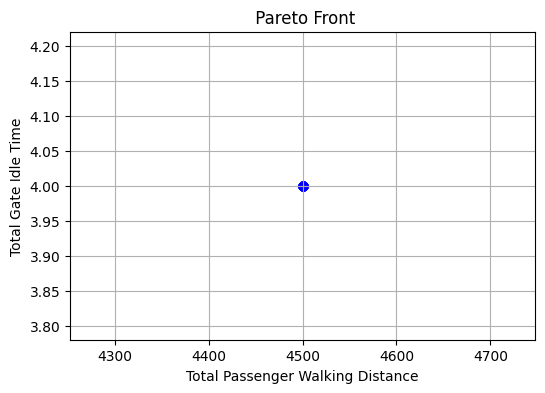

In [9]:
import numpy as np
from pymoo.core.problem import ElementwiseProblem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.termination import get_termination
from pymoo.optimize import minimize
import matplotlib.pyplot as plt

class GateAssignmentProblem(ElementwiseProblem):
    def __init__(self, n_aircraft, n_gates, arrivals, departures, W, D):
        super().__init__(
            n_var = n_aircraft,
            n_obj = 2,
            n_ieq_constr = 0,
            n_eq_constr = 0,
            xl = 0,
            xu = n_gates - 1,
            type_var = int
        )
        self.n_aircraft = n_aircraft
        self.n_gates = n_gates
        self.arrivals = np.array(arrivals)
        self.departures = np.array(departures)
        self.W = np.array(W)
        self.D = np.array(D)

    def _evaluate(self, x, out, *args, **kwargs):

        x_int = np.array(x, dtype=int)

        total_distance = 0.0
        for i in range(self.n_aircraft):
            gate = x_int[i]
            total_distance += self.W[i] * self.D[gate]

        total_idle_time = 0.0
        for g in range(self.n_gates):

            flights_at_g = [i for i in range(self.n_aircraft) if x_int[i] == g]
            if len(flights_at_g) > 1:

                flights_at_g.sort(key=lambda i: self.arrivals[i])

                for idx in range(1, len(flights_at_g)):
                    i_prev = flights_at_g[idx - 1]
                    i_curr = flights_at_g[idx]
                    gap = self.arrivals[i_curr] - self.departures[i_prev]
                    if gap > 0:
                        total_idle_time += gap

        out["F"] = [total_distance, total_idle_time]

# Example data
n_aircraft = 5
n_gates = 2
arrivals = [1, 3, 5, 7, 9]
departures = [2, 4, 6, 8, 10]
W = [100, 80, 120, 60, 90]
D = [10, 20]


problem = GateAssignmentProblem(
    n_aircraft=n_aircraft,
    n_gates=n_gates,
    arrivals=arrivals,
    departures=departures,
    W=W,
    D=D
)

# Configure NSGA-II
algorithm = NSGA2(
    pop_size=100,
    eliminate_duplicates=True
)
termination = get_termination("n_gen", 100)

# Run the optimization
res = minimize(
    problem,
    algorithm,
    termination,
    seed=42,
    save_history=True,
    verbose=False
)

# results
print("NSGA-II Optimization completed!")
print("Number of non-dominated solutions found:", len(res.X))

# Print the solutions and objectives
for i, (x_sol, f_sol) in enumerate(zip(res.X, res.F)):
    print(f"Solution #{i+1}:")
    print("  Gate Assignments (x) =", x_sol)
    print("  Objectives (f1, f2) =", f_sol)

# Visualize the Pareto front
F = np.array(res.F)
plt.figure(figsize=(6,4))
plt.scatter(F[:,0], F[:,1], c='blue')
plt.xlabel("Total Passenger Walking Distance")
plt.ylabel("Total Gate Idle Time")
plt.title(" Pareto Front")
plt.grid(True)
plt.show()